In [ ]:
!git clone https://github.com/facebookresearch/detectron2.git
! python -m pip install -e detectron2

Cloning into 'detectron2'...
remote: Enumerating objects: 15270, done.
remote: Counting objects: 100% (291/291), done.
remote: Compressing objects: 100% (186/186), done.
remote: Total 15270 (delta 151), reused 177 (delta 105), pack-reused 14979
Receiving objects: 100% (15270/15270), 6.30 MiB | 11.08 MiB/s, done.
Resolving deltas: 100% (11018/11018), done.
Obtaining file:///content/detectron2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.wh

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gdown --id 168NreHfHe2v1TwIjQFF7P1TAIV6MefKQ

/home/g202110550/.local/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=168NreHfHe2v1TwIjQFF7P1TAIV6MefKQ
From (redirected): https://drive.google.com/uc?id=168NreHfHe2v1TwIjQFF7P1TAIV6MefKQ&confirm=t&uuid=54fa0cc9-fcb4-44ac-bdb5-889620235817
To: /home/g202110550/train_new_lables.zip
100%|██████████████████████████████████████| 1.85M/1.85M [00:00<00:00, 1.88MB/s]


Here Give the link of your CBD dataset and Json file of annotation.

In [4]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train_R", {}, './coco128_train.json', "./Dataset_new/content/drive/MyDrive/Dataset_new/train_data_complex/images/train/")
register_coco_instances("my_dataset_Val_R", {},  './coco128_val.json', "./Dataset_new/content/drive/MyDrive/Dataset_new/train_data_complex/images/val/")
register_coco_instances("my_dataset_test1_R", {},  '/home/g202110550/coco_test_128.json', "/home/g202110550/Test_set/images/")



print("Done...")

Done...


Here Give the link of your SBD dataset and Json file of annotation.

In [ ]:
#####SKY_DATSET ###################3
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_Train1", {}, './Coco_format_json_files_for_skydata/train_sky.json', "./Sky_dataset/sky_train_data/images/train/")
register_coco_instances("my_dataset_val", {},  './Coco_format_json_files_for_skydata/val_sky.json', "./Sky_dataset/sky_train_data/images/val/")
# register_coco_instances("my_dataset_test1", {},  '/home/g202110550/coco_test_128.json', "/home/g202110550/Test_set/images/")



print("Done...")

Done...


WARNING [10/25 22:04:00 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[10/25 22:04:00 d2.data.datasets.coco]: Loaded 2550 images in COCO format from ./coco128_val.json


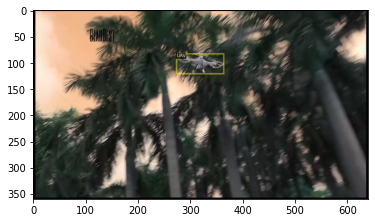

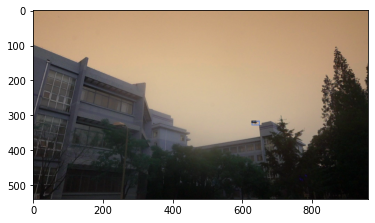

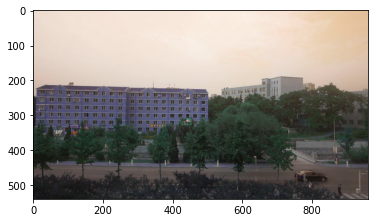

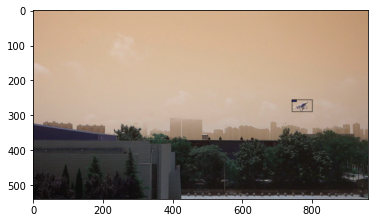

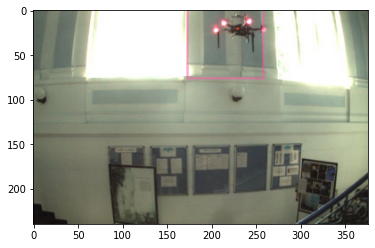

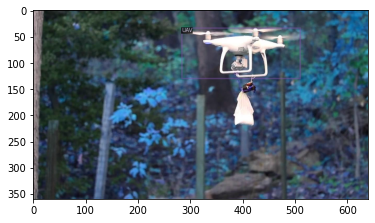

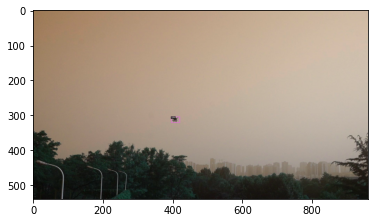

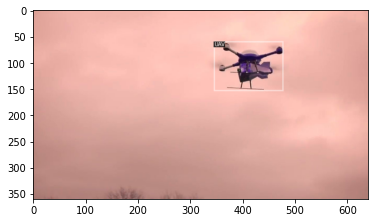

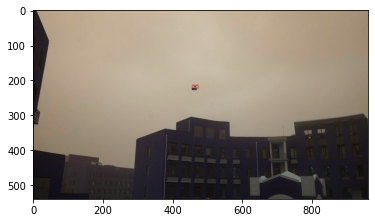

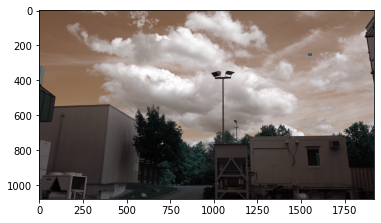

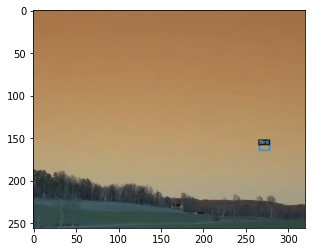

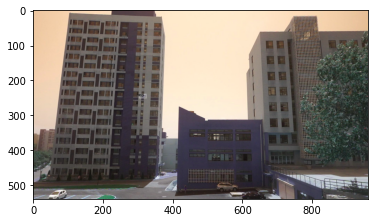

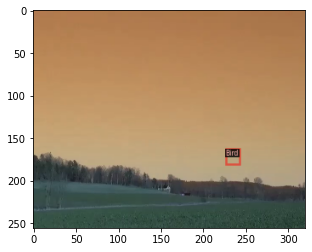

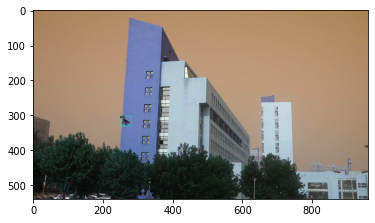

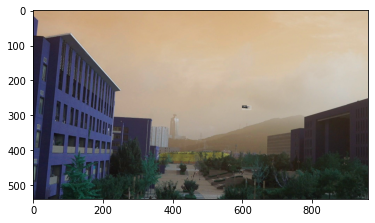

In [6]:
# visualize training data
from detectron2.data import MetadataCatalog, DatasetCatalog
my_dataset_train_metadata = MetadataCatalog.get("my_dataset_Val_R")
dataset_dicts = DatasetCatalog.get("my_dataset_Val_R")
# from google.colab.patches import cv2_imshow
import random
from matplotlib import pyplot as plt
plt.figure()
from detectron2.utils.visualizer import Visualizer
import cv2
# from google.colab.patches import cv2_imshow
for d in random.sample(dataset_dicts, 15):
    img = cv2.imread(d["file_name"])
    # cv2_imshow(img)
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=0.5)
    out = visualizer.draw_dataset_dict(d)
    plt.imshow(out.get_image()[:, :, ::-1])
    plt.show()
    print("\n")

In [13]:
# Train the model
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os
from detectron2.modeling import build_model

from detectron2.checkpoint import DetectionCheckpointer
from detectron2 import model_zoo
from detectron2.utils.logger import setup_logger
setup_logger()

# faster_rcnn
model_link = "COCO-Detection/retinanet_R_101_FPN_3x.yaml"

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(model_link))
cfg.DATASETS.TRAIN = ("my_dataset_train_R",)
cfg.DATASETS.TEST = ("my_dataset_val_R",)
cfg.DATALOADER.NUM_WORKERS = 0
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(model_link)
cfg.MODEL.WEIGHTS = "./Retina_Net/model_0019999.pth"
cfg.SOLVER.IMS_PER_BATCH = 1
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 20100
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 32
cfg.MODEL.RETINANET.NUM_CLASSES = 2
# cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.Z   # set the testing threshold for this model
# cfg.OUTPUT_DIR = "./Faster_RCNN/"
# os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
# resume_dir = os.getcwd()+'./output/' # get the last resume checkpoint file path
resume_dir = "./Retina_Net/"
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
# trainer.resume_or_load(resume_dir)
# trainer.train()


Loading config /home/g202110550/detectron2_repo/detectron2/model_zoo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


[10/25 23:46:59 d2.engine.defaults]: Model:
RetinaNet(
  (backbone): FPN(
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelP6P7(
      (p6): Conv2d(2048, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (p7): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2)

In [30]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset, LVISEvaluator
from detectron2.data import build_detection_test_loader
cfg.MODEL.WEIGHTS =  "./Retina_Net/model_0019999.pth"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
# cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.5
cfg.DATASETS.TEST = ("my_dataset_test1_R", )
evaluator = COCOEvaluator("my_dataset_test1_R", cfg, False, output_dir="./Retina_Net/")
val_loader = build_detection_test_loader(cfg, "my_dataset_test1_R")
inference_on_dataset(trainer.model, val_loader, evaluator)

[10/26 00:50:20 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [10/26 00:50:20 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [10/26 00:50:20 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[10/26 00:50:20 d2.data.datasets.coco]: Loaded 2528 images in COCO format from /home/g202110550/coco_test_128.json
[10/26 00:50:20 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/26 00:50:20 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/26 00:50:20 d2.data.common]: Serializing 2528 elements to byte tensors and concatenating them all ...
[10/26 00:50:20 d2.data.common]: Serialized dataset takes 0.5

OrderedDict([('bbox',
              {'AP': 46.75587110689221,
               'AP50': 84.39729280370561,
               'AP75': 44.88327999521458,
               'APs': 36.70821773324816,
               'APm': 55.600178213029224,
               'APl': 69.16364255404334,
               'AP-UAV': 57.654894288215466,
               'AP-Bird': 35.85684792556895})])

[10/26 00:42:21 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./Retina_Net/model_0019999.pth ...


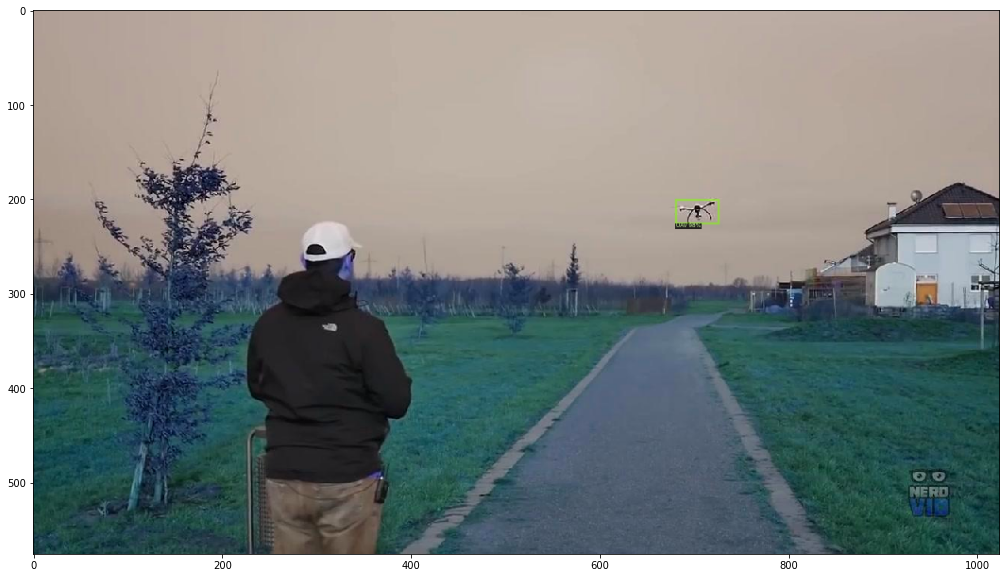

In [29]:
# Inference & evaluation using the trained model
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
import cv2
import shutil
from matplotlib import pyplot as plt
import os
# from google.colab.patches import cv2_imshow
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
# cfg already contains everything we've set previously. Now we changed it a little bit for inference:
cfg.MODEL.WEIGHTS =  "./Retina_Net/model_0019999.pth"
cfg.DATASETS.TEST = ("my_dataset_Val", )
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)
test_metadata = MetadataCatalog.get("my_dataset_Val")
MetadataCatalog.get("my_dataset_Val").thing_classes = ["UAV", "Bird"]
plt.rcParams["figure.figsize"] = (30,10)
from detectron2.utils.visualizer import ColorMode
import glob
import os
p=0
i=0
import numpy as np
import os
from os.path import splitext

im = cv2.imread("/home/g202110550/Test_set/images/00960.jpg")

# for imageName in glob.glob("/home/g202110550/Test_set/img/*.jpg"):
# im = cv2.imread("./BVD4.png")
# head, tail = os.path.split(imageName)
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1],
            metadata=test_metadata,
            scale=0.8
              )
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image()[:, :, ::-1])
